In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [83]:
df = pd.read_csv("perf_300_dataset.csv")
df


,Gradient_Deg,Irradiance_W/m2,Current_SOC,Wind_Speed_mps,Battery_Eff,Optimal_Speed_kph
0,-3.0,100,0.20,0,0.95,83.65
1,-3.0,100,0.20,5,0.95,66.02
2,-3.0,100,0.39,0,0.95,93.56
3,-3.0,100,0.39,5,0.95,75.82
4,-3.0,100,0.57,0,0.95,102.55
...,...,...,...,...,...,...
295,3.0,1000,0.57,5,0.95,9.52
296,3.0,1000,0.76,0,0.95,NaN
297,3.0,1000,0.76,5,0.95,NaN
298,3.0,1000,0.95,0,0.95,NaN


In [84]:
print(df.isnull().sum())

Gradient_Deg          0
Irradiance_W/m2       0
Current_SOC           0
Wind_Speed_mps        0
Battery_Eff           0
Optimal_Speed_kph    70
dtype: int64


In [85]:
df = df.dropna()
print(df.isnull().sum())

Gradient_Deg         0
Irradiance_W/m2      0
Current_SOC          0
Wind_Speed_mps       0
Battery_Eff          0
Optimal_Speed_kph    0
dtype: int64


In [86]:
df

,Gradient_Deg,Irradiance_W/m2,Current_SOC,Wind_Speed_mps,Battery_Eff,Optimal_Speed_kph
0,-3.0,100,0.20,0,0.95,83.65
1,-3.0,100,0.20,5,0.95,66.02
2,-3.0,100,0.39,0,0.95,93.56
3,-3.0,100,0.39,5,0.95,75.82
4,-3.0,100,0.57,0,0.95,102.55
...,...,...,...,...,...,...
291,3.0,1000,0.20,5,0.95,8.11
292,3.0,1000,0.39,0,0.95,9.03
293,3.0,1000,0.39,5,0.95,8.76
294,3.0,1000,0.57,0,0.95,9.85


In [87]:
#doing eda
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, 0 to 295
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gradient_Deg       230 non-null    float64
 1   Irradiance_W/m2    230 non-null    int64  
 2   Current_SOC        230 non-null    float64
 3   Wind_Speed_mps     230 non-null    int64  
 4   Battery_Eff        230 non-null    float64
 5   Optimal_Speed_kph  230 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 12.6 KB


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
X = df[['Gradient_Deg', 'Irradiance_W/m2', 'Current_SOC', 'Wind_Speed_mps', 'Battery_Eff']]
y = df['Optimal_Speed_kph']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr.predict(X_test)


In [89]:
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}: MSE={mse:.2f}, R²={r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")


Linear Regression: MSE=287.39, R²=0.76


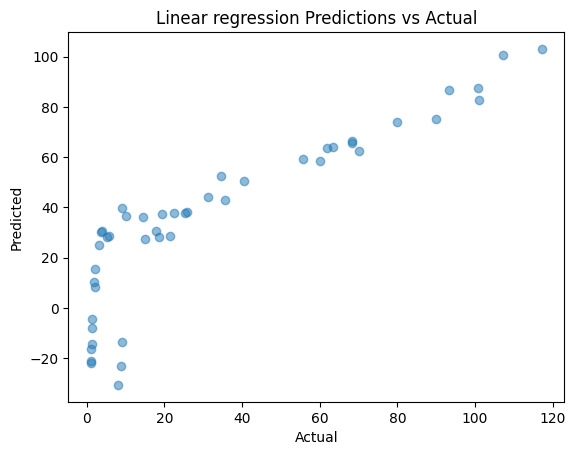

In [90]:
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear regression Predictions vs Actual")
plt.show()


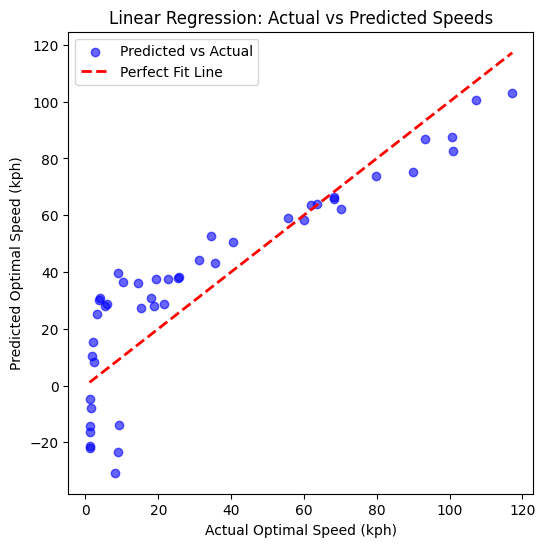

Linear Regression: MSE=287.39, R²=0.76, MAE=14.40


In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label="Perfect Fit Line")
plt.xlabel("Actual Optimal Speed (kph)")
plt.ylabel("Predicted Optimal Speed (kph)")
plt.title("Linear Regression: Actual vs Predicted Speeds")
plt.legend()
plt.show()
evaluate_model(y_test, y_pred_lr, "Linear Regression")


In [92]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [108]:
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}: MSE={mse:.6f}, R²={r2}, MAE={mae:.6f}")

evaluate_model(y_test, y_pred_rf, "Random Forest")

Random Forest: MSE=28.282476, R²=0.9764835988470845, MAE=3.795383


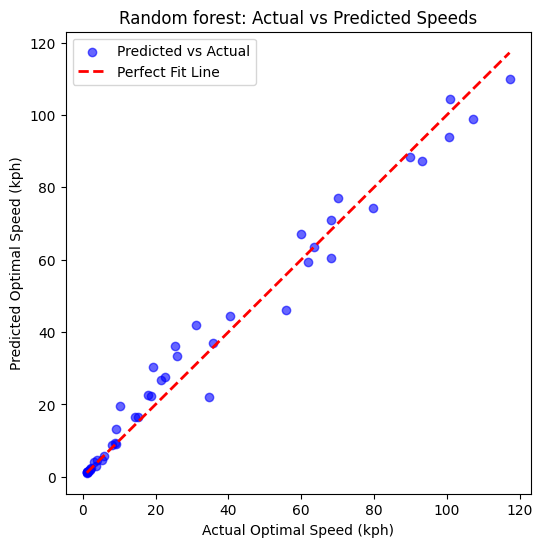

Random Forest: MSE=28.282476, R²=0.9764835988470845, MAE=3.795383


In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label="Perfect Fit Line")
plt.xlabel("Actual Optimal Speed (kph)")
plt.ylabel("Predicted Optimal Speed (kph)")
plt.title("Random forest: Actual vs Predicted Speeds")
plt.legend()
plt.show()
evaluate_model(y_test, y_pred_rf, "Random Forest")


In [95]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)


In [96]:
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}: MSE={mse:.2f}, R²={r2:.2f}, MAE={mae:.2f}")

evaluate_model(y_test, y_pred_ridge, "Ridge")
evaluate_model(y_test, y_pred_lasso, "Lasso")

Ridge: MSE=283.00, R²=0.76, MAE=14.37
Lasso: MSE=284.44, R²=0.76, MAE=14.38


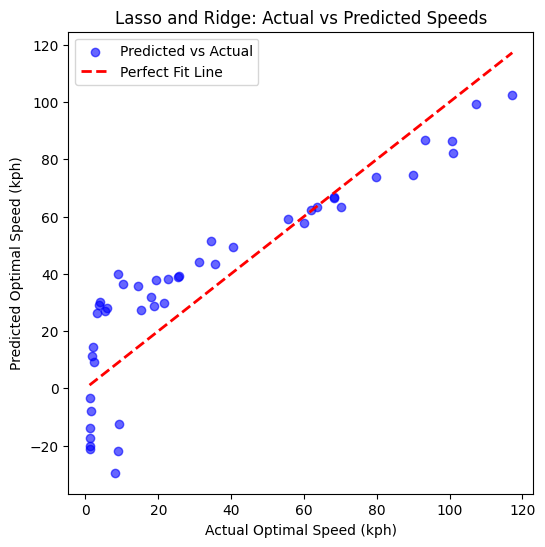

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ridge, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label="Perfect Fit Line")
plt.xlabel("Actual Optimal Speed (kph)")
plt.ylabel("Predicted Optimal Speed (kph)")
plt.title("Lasso and Ridge: Actual vs Predicted Speeds")
plt.legend()
plt.show()


In [98]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gbr.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting - MSE: {mse}, MAE: {mae}, R2: {r2}")


Gradient Boosting - MSE: 16.010085065766745, MAE: 2.9315754127175184, R2: 0.9866878844612016


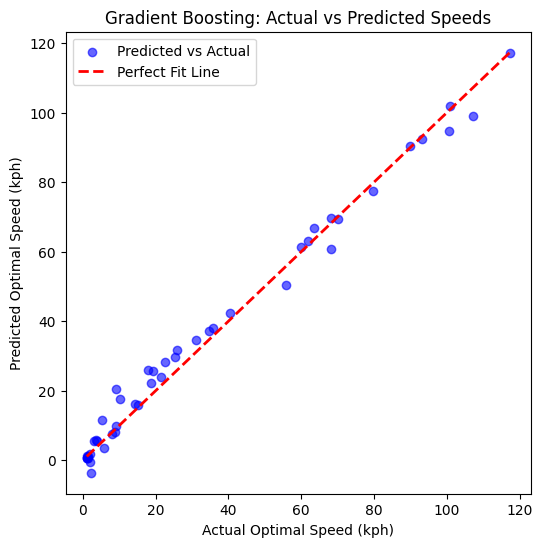

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_gbr, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label="Perfect Fit Line")
plt.xlabel("Actual Optimal Speed (kph)")
plt.ylabel("Predicted Optimal Speed (kph)")
plt.title("Gradient Boosting: Actual vs Predicted Speeds")
plt.legend()
plt.show()

In [100]:
import xgboost as xgb

# Initialize the model
xgbr = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
xgbr.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgbr.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse}, MAE: {mae}, R2: {r2}")


XGBoost - MSE: 14.823775288347154, MAE: 2.9738170254003733, R2: 0.9876742810204293


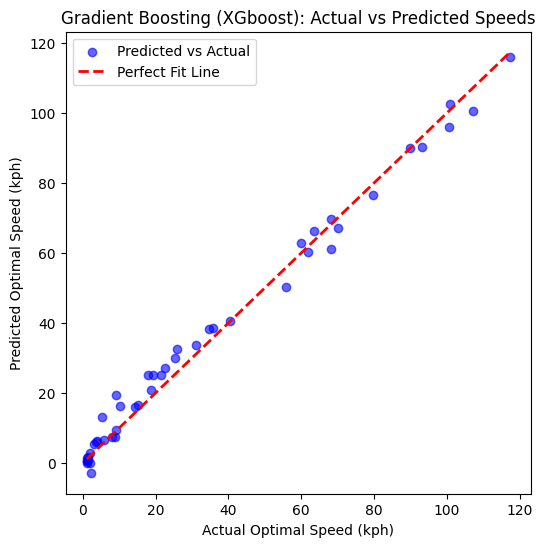

XGBoost Performance - MSE: 16.010085, MAE: 2.931575, R2: 0.986688


In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_xgb, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label="Perfect Fit Line")
plt.xlabel("Actual Optimal Speed (kph)")
plt.ylabel("Predicted Optimal Speed (kph)")
plt.title("Gradient Boosting (XGboost): Actual vs Predicted Speeds")
plt.legend()
plt.show()
print(f"XGBoost Performance - MSE: {mse:.6f}, MAE: {mae:.6f}, R2: {r2:.6f}")